# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [13]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


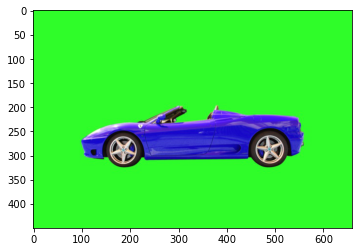

In [35]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)


### Define the color threshold

In [57]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,150,0]) 
upper_green = np.array([100,255,100])


### Create a mask

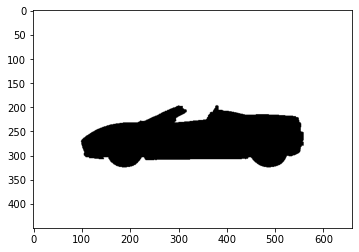

In [58]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

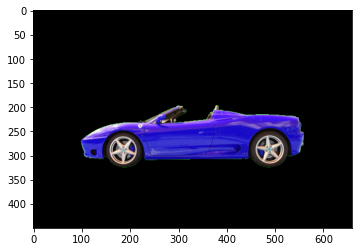

In [59]:
# Mask the image to let the car show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

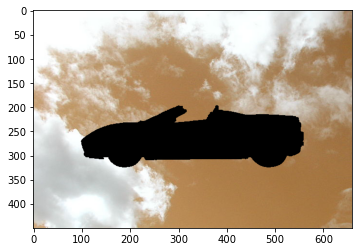

In [60]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:450, 0:660]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

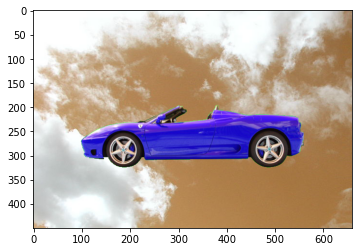

In [61]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)